In [ ]:
import sys
print(sys.version)

In [4]:
x = 'Hello' # Assigning a value to a variable
y = 1 # Dynamic typing means that you don't need to declare in advance the type the variable will have

# But once assigned, the variable will be associated with a certain object type 
# as long as the value remains of that type
print(x, type(x))

x += ' World'
print(x, type(x))

x = y
print(x, type(x))
print(y, type(y))

Hello <class 'str'>
Hello World <class 'str'>
1 <class 'int'>
1 <class 'int'>


In [5]:
t = True
f = False
print(type(t))

<class 'bool'>


In [14]:
s = "hello"
print(s.capitalize())  # Capitalize a string; prints "Hello"
print(s.upper())       # Convert a string to uppercase; prints "HELLO"
print(s.rjust(7))      # Right-justify a string, padding with spaces; prints "  hello"
print(s.center(7))     # Center a string, padding with spaces; prints " hello "
print(s.replace('l', '(ell)'))  # Replace all instances of one substring with another;
                                # prints "he(ell)(ell)o"
print('  world '.strip())  # Strip leading and trailing whitespace; prints "world"

Hello
HELLO
  hello
 hello 
he(ell)(ell)o
world


In [16]:
first_list = ['Data', 2, 3, 'Hello']
second_list = first_list    
print(id(first_list))
print(id(second_list))

4587551560
4587551560


In [18]:
first_list[3] = 'Bye'
print(first_list)
print(second_list)

['Data', 2, 3, 'Bye']
['Data', 2, 3, 'Bye']


In [20]:
# Tuples are immutable
triplet = (1, 2, 3)
triplet[1] = 6

TypeError: 'tuple' object does not support item assignment

In [21]:
# Strings are immutable
word = 'Has'
word[2] = 'd'

TypeError: 'str' object does not support item assignment

In [22]:
# What happens here?
word += ' pens'
print(word)

Has pens


In [23]:
# Loops
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)

cat
dog
monkey


In [25]:
#Sets
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"
animals.add('fish')       # Add an element to a set
print('fish' in animals)  # Prints "True"
print(len(animals))       # Number of elements in a set; prints "3"
animals.add('cat')        # Adding an element that is already in the set does nothing
print(len(animals))       # Prints "3"
animals.remove('cat')     # Remove an element from a set
print(len(animals))       # Prints "2"

True
False
True
3
3
2


In [26]:
# Functions
def f(x, g, squared=False):
    if squared:
        return g(x)**2
    else:
        return g(x)
    
def identity(y):
    return y

In [27]:
assert(f(5, identity) == 5)

#NUMPY

In [28]:
import numpy as np

In [30]:
a = np.arange(16).reshape(4, 4)
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [36]:
for row in a:
  print(row)

[0 1 2 3]
[4 5 6 7]
[ 8  9 10 11]
[12 13 14 15]


In [31]:
print(a.ndim) #the number of axes (dimensions) of the array
print(a.shape) #a tuple of integers indicating the size of the array in each dimension
print(a.size) #the total number of elements of the array
print(a.dtype) # an object describing the type of the elements in the array
print(a.itemsize) #the size in bytes of each element of the array
print(a.data) #the buffer containing the actual elements of the array

2
(4, 4)
16
int64
8


In [33]:
id(a)

4604975024

In [34]:
b = np.array([11., 32., 14.])
#c = np.array([11, 32, 14], float) #explicity specify the data type too!
print(b.dtype)

float64


In [35]:
np.ones((3, 3))
np.zeros((2, 2))
np.identity(3) #indentity matrix
np.diag(np.array([1, 2, 3, 4])) #to change the elements of diagonal.

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [37]:
#Array slicing examples:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a)
print(a[1, :])

[[1 2 3]
 [4 5 6]]
[4 5 6]


In [39]:
a=a.ravel()
print(a)

[1 2 3 4 5 6]


In [40]:
np.transpose(a)

array(1)

In [41]:
a = np.array([[6, 4], [5, 9]])
sel = (a >= 6)
a[sel] = 0;
a

array([[0, 4],
       [5, 0]])

SCIKIT-LEARN: http://scikit-learn.org/stable/index.html

In [48]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

SUPERVISED LEARNING
http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html#datasets

LINEAR REGRESSION: http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


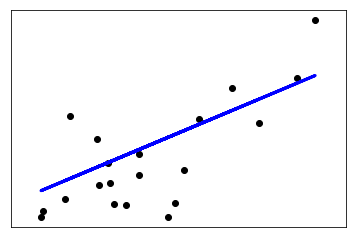

In [45]:
# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
#coefficient of determination
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.show()

LOGISTIC REGRESSION: http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py

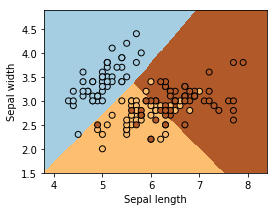

In [31]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

SUPPORT VECTOR MACHINE: http://scikit-learn.org/stable/auto_examples/exercises/plot_iris_exercise.html#sphx-glr-auto-examples-exercises-plot-iris-exercise-py 

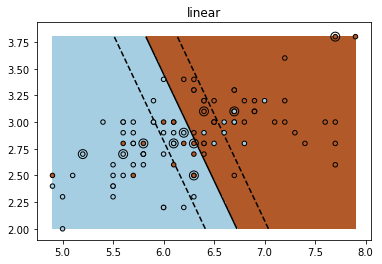

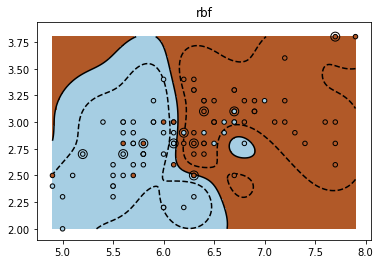

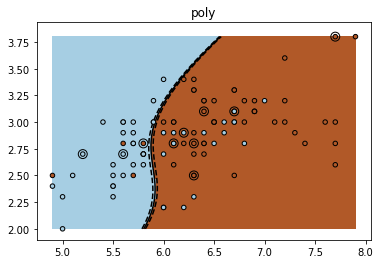

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)

X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]

# fit the model
for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

References: 
http://cs231n.github.io/python-numpy-tutorial/, Previous IDS Lectures, Scikit-Learn